# Weight Lifting Correctness Assessment Case

The goal of this project is to predict the manner in which athletes did the exercise. This is the "classe" variable in the training set. Also coordinates obtained from accelerometers on the belt, forearm, arm, and dumbell have been used to predict quality of doing bicep curl. I have created a report describing model details on how I have used cross validation, what was the expected out of sample error is, and why I chose the random forest as a prediction instrument. I have also use my prediction model to predict 20 different test cases. 

In [ ]:
library('lattice')
library('ggplot2')
suppressWarnings(suppressMessages(library('dplyr', quiet = T)))
library('caret', quiet = T)
library('splines')
library('parallel')
suppressWarnings(suppressMessages(library('survival', quiet = T)))
suppressWarnings(suppressMessages(library('randomForest', quiet = T)))
suppressWarnings(suppressMessages(library('gbm', quiet = T)))
suppressWarnings(suppressMessages(library('rattle', quiet = T)))

In [2]:
suppressWarnings(
    suppressMessages(
    training <- readr::read_csv('pml-training.csv')))

suppressWarnings(
    suppressMessages(
    testing <- readr::read_csv('pml-testing.csv')))

In [3]:
str(training)

spec_tbl_df [19,622 × 160] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1                    : num [1:19622] 1 2 3 4 5 6 7 8 9 10 ...
 $ user_name               : chr [1:19622] "carlitos" "carlitos" "carlitos" "carlitos" ...
 $ raw_timestamp_part_1    : num [1:19622] 1.32e+09 1.32e+09 1.32e+09 1.32e+09 1.32e+09 ...
 $ raw_timestamp_part_2    : num [1:19622] 788290 808298 820366 120339 196328 ...
 $ cvtd_timestamp          : chr [1:19622] "05/12/2011 11:23" "05/12/2011 11:23" "05/12/2011 11:23" "05/12/2011 11:23" ...
 $ new_window              : chr [1:19622] "no" "no" "no" "no" ...
 $ num_window              : num [1:19622] 11 11 11 12 12 12 12 12 12 12 ...
 $ roll_belt               : num [1:19622] 1.41 1.41 1.42 1.48 1.48 1.45 1.42 1.42 1.43 1.45 ...
 $ pitch_belt              : num [1:19622] 8.07 8.07 8.07 8.05 8.07 8.06 8.09 8.13 8.16 8.17 ...
 $ yaw_belt                : num [1:19622] -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 -94.4 ...
 $ total_accel_belt        : num

In [4]:
head(testing)

...1,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,⋯,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,⋯,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,⋯,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,⋯,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,⋯,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,⋯,-0.75,3.10,0.80,131,-93,172,375,-787,91,5
6,jeremy,1322673149,510661,30/11/2011 17:12,no,504,-5.92,1.59,-87.70,⋯,-0.88,4.26,1.35,230,322,-144,-300,800,884,6


In [5]:
# Count the number of missing values in each row
row_na_count <- lapply(training, FUN = function(x) length(which(is.na(x))))

In [6]:
data.frame(number_of_ommisions=t(data.frame(row_na_count)[-1]))

,number_of_ommisions
,<int>
user_name,0
raw_timestamp_part_1,0
raw_timestamp_part_2,0
cvtd_timestamp,0
new_window,0
num_window,0
roll_belt,0
pitch_belt,0
yaw_belt,0


In [7]:
training$classe <- as.factor(training$classe)

In [8]:
str(training$classe)

 Factor w/ 5 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...


In [9]:
names(training)[names(testing) != names(training)]

[1] "classe"

In [10]:
names(testing)[names(testing) != names(training)]

[1] "problem_id"

For feature extraction we only use the variables which are related to the raw measurements from the sensors located on the belt, forearm, arm, and dumbell for the physical movement during the exercise. The sensor data can be represented in variables related to the Euler angles (roll, pitch, and yaw) and accelerometer, gyroscope, and magnetometer readings for each of the 4 sensor locations. These variables appear with the following name patterns in the dataset.

## Predictors Data Set

In [11]:
predictorIdx <- c(grep("^accel", names(training)), 
                  grep("^gyros", names(training)), 
                  grep("^magnet", names(training)), 
                  grep("^roll", names(training)), 
                  grep("^pitch", names(training)), 
                  grep("^yaw", names(training)), 
                  grep("^total", names(training)))
trainPredSet <- training[, c(predictorIdx, 160)]
testPredSet <- testing[, c(predictorIdx, 160)]

In [12]:
names(testPredSet)

[1] "accel_belt_x"         "accel_belt_y"         "accel_belt_z"        
 [4] "accel_arm_x"          "accel_arm_y"          "accel_arm_z"         
 [7] "accel_dumbbell_x"     "accel_dumbbell_y"     "accel_dumbbell_z"    
[10] "accel_forearm_x"      "accel_forearm_y"      "accel_forearm_z"     
[13] "gyros_belt_x"         "gyros_belt_y"         "gyros_belt_z"        
[16] "gyros_arm_x"          "gyros_arm_y"          "gyros_arm_z"         
[19] "gyros_dumbbell_x"     "gyros_dumbbell_y"     "gyros_dumbbell_z"    
[22] "gyros_forearm_x"      "gyros_forearm_y"      "gyros_forearm_z"     
[25] "magnet_belt_x"        "magnet_belt_y"        "magnet_belt_z"       
[28] "magnet_arm_x"         "magnet_arm_y"         "magnet_arm_z"        
[31] "magnet_dumbbell_x"    "magnet_dumbbell_y"    "magnet_dumbbell_z"   
[34] "magnet_forearm_x"     "magnet_forearm_y"     "magnet_forearm_z"    
[37] "roll_belt"            "roll_arm"             "roll_dumbbell"       
[40] "roll_forearm"         "pitch_belt"           "pitch_arm"           
[43] "pitch_dumbbell"       "pitch_forearm"        "yaw_belt"            
[46] "yaw_arm"              "yaw_dumbbell"         "yaw_forearm"         
[49] "total_accel_belt"     "total_accel_arm"      "total_accel_dumbbell"
[52] "total_accel_forearm"  "problem_id"

In [13]:
head(trainPredSet); head(testPredSet)

accel_belt_x,accel_belt_y,accel_belt_z,accel_arm_x,accel_arm_y,accel_arm_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,accel_forearm_x,⋯,pitch_forearm,yaw_belt,yaw_arm,yaw_dumbbell,yaw_forearm,total_accel_belt,total_accel_arm,total_accel_dumbbell,total_accel_forearm,classe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-21,4,22,-288,109,-123,-234,47,-271,192,⋯,-63.9,-94.4,-161,-84.87394,-153,3,34,37,36,A
-22,4,22,-290,110,-125,-233,47,-269,192,⋯,-63.9,-94.4,-161,-84.71065,-153,3,34,37,36,A
-20,5,23,-289,110,-126,-232,46,-270,196,⋯,-63.9,-94.4,-161,-85.14078,-152,3,34,37,36,A
-22,3,21,-289,111,-123,-232,48,-269,189,⋯,-63.9,-94.4,-161,-84.87363,-152,3,34,37,36,A
-21,2,24,-289,111,-123,-233,48,-270,189,⋯,-63.9,-94.4,-161,-84.85306,-152,3,34,37,36,A
-21,4,21,-289,111,-122,-234,48,-269,193,⋯,-63.9,-94.4,-161,-84.46500,-152,3,34,37,36,A


accel_belt_x,accel_belt_y,accel_belt_z,accel_arm_x,accel_arm_y,accel_arm_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,accel_forearm_x,⋯,pitch_forearm,yaw_belt,yaw_arm,yaw_dumbbell,yaw_forearm,total_accel_belt,total_accel_arm,total_accel_dumbbell,total_accel_forearm,problem_id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-38,69,-179,16,38,93,21,-15,81,-110,⋯,49.30,-4.75,178,126.23596,156.0,20,10,9,33,1
-13,11,39,-290,215,-90,-153,155,-205,212,⋯,-17.60,-88.90,0,-75.51480,106.0,4,38,31,39,2
1,-1,49,-341,245,-87,-141,155,-196,154,⋯,-32.60,-88.50,0,-75.20287,93.0,5,44,29,34,3
46,45,-156,-238,-57,6,-51,72,-148,-92,⋯,0.00,162.00,-142,-103.32003,0.0,17,25,18,43,4
-8,4,27,-197,200,-30,-18,-30,-5,131,⋯,-2.16,-88.60,102,-14.19542,-47.9,3,29,4,24,5
-11,-16,38,-26,130,-19,-138,166,-186,230,⋯,1.46,-87.70,0,-71.12063,89.7,4,14,29,43,6


In [14]:
#Check on ommited data
sum(is.na(trainPredSet));sum(is.na(testPredSet))

[1] 0

[1] 0

In [15]:
nearZeroVar(trainPredSet, saveMetric = T)

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
accel_belt_x,1.055412,0.8357966,FALSE,FALSE
accel_belt_y,1.113725,0.7287738,FALSE,FALSE
accel_belt_z,1.078767,1.5237998,FALSE,FALSE
accel_arm_x,1.017341,3.9598410,FALSE,FALSE
accel_arm_y,1.140187,2.7367241,FALSE,FALSE
accel_arm_z,1.128000,4.0362858,FALSE,FALSE
accel_dumbbell_x,1.018018,2.1659362,FALSE,FALSE
accel_dumbbell_y,1.053061,2.3748853,FALSE,FALSE
accel_dumbbell_z,1.133333,2.0894914,FALSE,FALSE


# Training Model

In order to evaluate our prediction algorithm cross-validation is used. 

In [16]:
set.seed(3335) 
inTrain <- createDataPartition(y = trainPredSet[['classe']], p =.8, list = F)
Train <- trainPredSet[inTrain,]
Test <- trainPredSet[-inTrain,]

In [17]:
head(Train)

accel_belt_x,accel_belt_y,accel_belt_z,accel_arm_x,accel_arm_y,accel_arm_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,accel_forearm_x,⋯,pitch_forearm,yaw_belt,yaw_arm,yaw_dumbbell,yaw_forearm,total_accel_belt,total_accel_arm,total_accel_dumbbell,total_accel_forearm,classe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-21,4,22,-288,109,-123,-234,47,-271,192,⋯,-63.9,-94.4,-161,-84.87394,-153,3,34,37,36,A
-20,5,23,-289,110,-126,-232,46,-270,196,⋯,-63.9,-94.4,-161,-85.14078,-152,3,34,37,36,A
-21,2,24,-289,111,-123,-233,48,-270,189,⋯,-63.9,-94.4,-161,-84.85306,-152,3,34,37,36,A
-22,3,21,-289,111,-125,-232,47,-270,195,⋯,-63.9,-94.4,-161,-85.09961,-152,3,34,37,36,A
-22,4,21,-289,111,-124,-234,46,-272,193,⋯,-63.8,-94.4,-161,-85.09708,-152,3,34,37,36,A
-20,2,24,-288,109,-122,-232,47,-269,193,⋯,-63.8,-94.4,-161,-84.91563,-152,3,34,37,36,A


In [18]:
ctrl <- trainControl(method = 'repeatedcv', number = 5, repeats = 5)
ctrl

$method
[1] "repeatedcv"

$number
[1] 5

$repeats
[1] 5

$p
[1] 0.75

$initialWindow
NULL

$horizon
[1] 1

$fixedWindow
[1] TRUE

$verboseIter
[1] FALSE

$returnData
[1] TRUE

$returnResamp
[1] "final"

$savePredictions
[1] FALSE

$classProbs
[1] FALSE

$summaryFunction
function (data, lev = NULL, model = NULL) 
{
    if (is.character(data$obs)) 
        data$obs <- factor(data$obs, levels = lev)
    postResample(data[, "pred"], data[, "obs"])
}
<bytecode: 0x00000182c5b5db48>
<environment: namespace:caret>

$selectionFunction
[1] "best"

$preProcOptions
$preProcOptions$thresh
[1] 0.95

$preProcOptions$ICAcomp
[1] 3

$preProcOptions$k
[1] 5


$index
NULL

$indexOut
NULL

$timingSamps
[1] 0

$predictionBounds
[1] FALSE FALSE

$seeds
[1] NA

$adaptive
$adaptive$min
[1] 5

$adaptive$alpha
[1] 0.05

$adaptive$method
[1] "gls"

$adaptive$complete
[1] TRUE


$trim
[1] FALSE

$allowParallel
[1] TRUE

In [19]:
set.seed(3335)
suppressWarnings(suppressMessages(library(MASS, quiet = T)))
modQdaFit <- train(classe~. , data = Train, method = 'qda', preProcess = c('center', 'scale'), 
               trControl = ctrl)

In [20]:
modQdaFit$results

,parameter,Accuracy,Kappa,AccuracySD,KappaSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.8930502,0.8649185,0.005943923,0.007469182


In [21]:
predictQda<-predict(modQdaFit, Test)
predictQda<-data.frame(class = predictQda)

In [22]:
# Random Forest
set.seed(3335)
#Cross validation set
cvset <- createDataPartition(trainPredSet$classe, p=.8, list = F)
cvTrain <- trainPredSet[cvset,] 
cvTest <- trainPredSet[-cvset,]

In [23]:
inTrainRF <- createDataPartition(cvTrain$classe, p = .7, list = F)

train <- cvTrain[inTrainRF,]
test <- cvTrain[-inTrainRF,]

In [24]:
modRfFit <- randomForest(classe~., data = train)

In [67]:
# ntree
modRfFit$ntree

[1] 500

In [68]:
#err. rate
modRfFit$err.rate

OOB,A,B,C,D,E
0.11345776,0.07712082,0.14046392,0.16320475,0.11911765,0.092903226
0.10512782,0.06694561,0.13443396,0.15254237,0.11029412,0.086206897
0.09846827,0.06141465,0.12098299,0.13802817,0.11621021,0.079628401
0.09455804,0.05595463,0.11771364,0.12695435,0.10807292,0.087853774
0.08816682,0.04876325,0.11128776,0.12485414,0.10901340,0.071982281
0.08127003,0.03872283,0.10880567,0.11547085,0.10745743,0.062896406
0.06928253,0.03597602,0.09394983,0.09716157,0.08553387,0.054067971
0.06146660,0.02820597,0.08680892,0.09032258,0.07539683,0.046700508
0.05320133,0.02401818,0.07684918,0.07336523,0.07195053,0.037783375
0.05119956,0.02353320,0.07421503,0.07135307,0.06759777,0.036126443


In [59]:
#Confusion
modRfFit$confusion

,A,B,C,D,E,class.error
A,3123,2,0,0,0,0.000640000
B,17,2106,4,0,0,0.009873061
C,0,18,1897,2,0,0.010432968
D,0,0,25,1776,1,0.014428413
E,0,0,2,8,2011,0.004948046


In [65]:
modRfFit$forest$ncat

accel_belt_x         accel_belt_y         accel_belt_z 
                   1                    1                    1 
         accel_arm_x          accel_arm_y          accel_arm_z 
                   1                    1                    1 
    accel_dumbbell_x     accel_dumbbell_y     accel_dumbbell_z 
                   1                    1                    1 
     accel_forearm_x      accel_forearm_y      accel_forearm_z 
                   1                    1                    1 
        gyros_belt_x         gyros_belt_y         gyros_belt_z 
                   1                    1                    1 
         gyros_arm_x          gyros_arm_y          gyros_arm_z 
                   1                    1                    1 
    gyros_dumbbell_x     gyros_dumbbell_y     gyros_dumbbell_z 
                   1                    1                    1 
     gyros_forearm_x      gyros_forearm_y      gyros_forearm_z 
                   1                    1                    1 
       magnet_belt_x        magnet_belt_y        magnet_belt_z 
                   1                    1                    1 
        magnet_arm_x         magnet_arm_y         magnet_arm_z 
                   1                    1                    1 
   magnet_dumbbell_x    magnet_dumbbell_y    magnet_dumbbell_z 
                   1                    1                    1 
    magnet_forearm_x     magnet_forearm_y     magnet_forearm_z 
                   1                    1                    1 
           roll_belt             roll_arm        roll_dumbbell 
                   1                    1                    1 
        roll_forearm           pitch_belt            pitch_arm 
                   1                    1                    1 
      pitch_dumbbell        pitch_forearm             yaw_belt 
                   1                    1                    1 
             yaw_arm         yaw_dumbbell          yaw_forearm 
                   1                    1                    1 
    total_accel_belt      total_accel_arm total_accel_dumbbell 
                   1                    1                    1 
 total_accel_forearm 
                   1

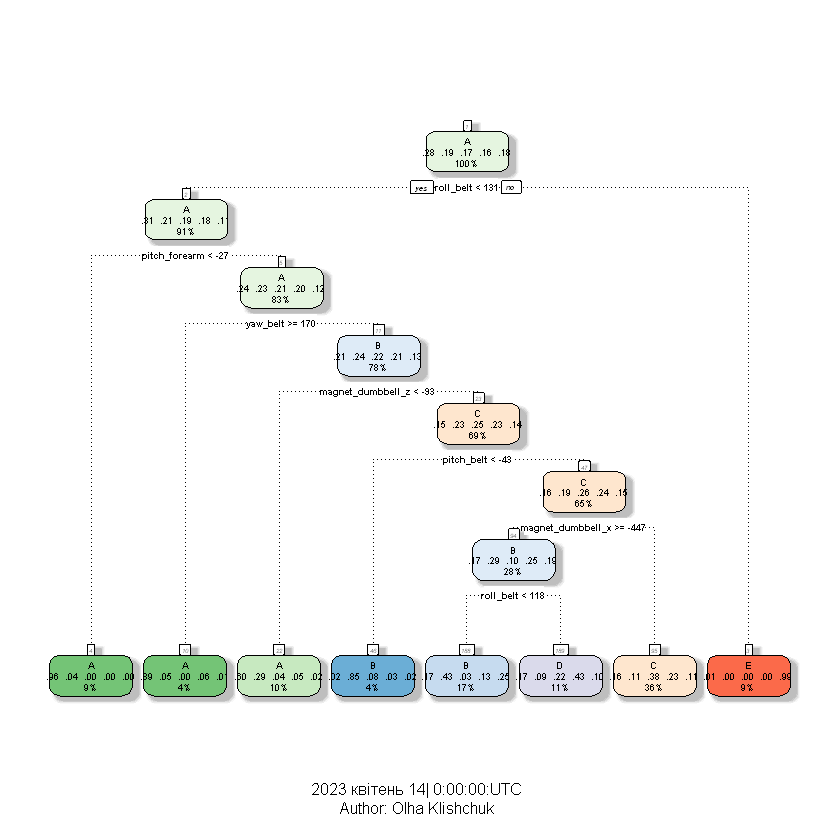

In [26]:
suppressWarnings(suppressMessages(library(rpart, quiet = T)))
suppressWarnings(
    fancyRpartPlot(train(classe~., train, method = 'rpart')$finalModel, sub = paste(format(Sys.Date(), "%Y %B %d| %X:%Z"),"\nAuthor: Olha Klishchuk")))

In [27]:
modRfFit2 <- randomForest(classe~., data = Train)

In [28]:
predictTest<-predict(modRfFit, test)

In [29]:
equality <- as.character(predictTest) == as.character(test$classe)

cat(paste(round(sum(equality, na.rm = T)/length(predictTest)*100, 2), "%"))

predictTest <- data.frame(class = predictTest)

99.3 %

In [30]:
predictTest2 <- predict(modRfFit2, Test)

equality2 <- as.character(predictTest2) == as.character(Test$classe)

cat(paste(round(sum(equality2, na.rm = T)/length(predictTest2)*100, 1), "%"))

predictTest2 <- data.frame(class = predictTest2)

99.6 %

#### Now lets estimate for test sample

In [31]:
# Validation sample
predictCV<-predict(modRfFit, cvTest)
predictCV<-data.frame(class = predictCV)

# Out-of-sample Error

### Quadratic Discriminant model

In [32]:
predictQda[,'sensitivity'] = ifelse(predictQda[,1] == Test$classe, TRUE, FALSE)
round(prop.table(table(predictQda[['class']], predictQda[['sensitivity']]), margin = 1)*100, 2)

   
    FALSE  TRUE
  A  3.72 96.28
  B 15.36 84.64
  C 25.52 74.48
  D  7.86 92.14
  E  1.67 98.33

### Random Forest

In [33]:
# Prediction on the testing sample
predictTest[,'accuracy'] = ifelse(predictTest[,'class'] == test$classe, TRUE, FALSE)
head(predictTest, 20)

,class,accuracy
,<fct>,<lgl>
1,A,TRUE
2,A,TRUE
3,A,TRUE
4,A,TRUE
5,A,TRUE
6,A,TRUE
7,A,TRUE
8,A,TRUE
9,A,TRUE


In [34]:
accuracy_levels<-prop.table(table(predictTest$class,predictTest$accuracy), margin = 1)*100
round(accuracy_levels, 2)

   
    FALSE  TRUE
  A  0.45 99.55
  B  0.66 99.34
  C  1.81 98.19
  D  0.65 99.35
  E  0.12 99.88

In [35]:
# Cross validation sample
predictCV<-data.frame(class = predictCV)
predictCV[,'accuracy'] = ifelse(predictCV[,1] == cvTest$classe, TRUE, FALSE)
head(predictCV)

,class,accuracy
,<fct>,<lgl>
1,A,TRUE
2,A,TRUE
3,A,TRUE
4,A,TRUE
5,A,TRUE
6,A,TRUE


In [36]:
table(predictCV$class,predictCV$accuracy)

   
    FALSE TRUE
  A     2 1115
  B     4  756
  C    18  679
  D     7  627
  E     0  715

In [37]:
accuracy_level<-prop.table(table(predictCV$class,predictCV$accuracy), margin = 1)*100

round(accuracy_level, 2)

   
     FALSE   TRUE
  A   0.18  99.82
  B   0.53  99.47
  C   2.58  97.42
  D   1.10  98.90
  E   0.00 100.00

In [38]:
# Test sample
predictTest2[,'accuracy'] = ifelse(predictTest2$class == Test$classe, TRUE, FALSE)
head(predictTest2, 20)

,class,accuracy
,<fct>,<lgl>
1,A,TRUE
2,A,TRUE
3,A,TRUE
4,A,TRUE
5,A,TRUE
6,A,TRUE
7,A,TRUE
8,A,TRUE
9,A,TRUE


In [39]:
round(prop.table(table(predictTest2$class, predictTest2$accuracy), margin = 1)*100, 2)


   
     FALSE   TRUE
  A   0.09  99.91
  B   0.13  99.87
  C   1.44  98.56
  D   0.63  99.37
  E   0.00 100.00

In [40]:
# confusion Matrix
# QDA model
confusionMatrix(predictQda$class, Test$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1034   40    0    0    0
         B   49  628   39    3   23
         C   10   82  642   97   31
         D   22    3    3  539   18
         E    1    6    0    4  649

Overall Statistics
                                          
               Accuracy : 0.8901          
                 95% CI : (0.8799, 0.8998)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8613          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9265   0.8274   0.9386   0.8383   0.9001
Specificity            0.9857   0.9640   0.9321   0.9860   0.9966
Pos Pred Value         0.9628   0.8464   0.7448   0.9214   0.9833
Neg Pred Value         0.9712   0.9588   0.9863   0.9688   0.9779
Prevalence    

In [41]:
#RF
# test set
confusionMatrix(predictTest$class, test$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1337    6    0    0    0
         B    1  904    5    0    0
         C    0    1  815   12    2
         D    0    0    1  759    4
         E    1    0    0    0  859

Overall Statistics
                                          
               Accuracy : 0.993           
                 95% CI : (0.9902, 0.9952)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9911          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9985   0.9923   0.9927   0.9844   0.9931
Specificity            0.9982   0.9984   0.9961   0.9987   0.9997
Pos Pred Value         0.9955   0.9934   0.9819   0.9935   0.9988
Neg Pred Value         0.9994   0.9982   0.9985   0.9970   0.9984
Prevalence    

In [42]:
# validation set
confusionMatrix(predictCV$class, cvTest$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1115    2    0    0    0
         B    1  756    3    0    0
         C    0    1  679   16    1
         D    0    0    2  627    5
         E    0    0    0    0  715

Overall Statistics
                                          
               Accuracy : 0.9921          
                 95% CI : (0.9888, 0.9946)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.99            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9991   0.9960   0.9927   0.9751   0.9917
Specificity            0.9993   0.9987   0.9944   0.9979   1.0000
Pos Pred Value         0.9982   0.9947   0.9742   0.9890   1.0000
Neg Pred Value         0.9996   0.9991   0.9985   0.9951   0.9981
Prevalence    

In [43]:
# test sample from pml-testing.csv
confusionMatrix(predictTest2$class, Test$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1115    1    0    0    0
         B    1  757    0    0    0
         C    0    1  683    9    0
         D    0    0    1  634    3
         E    0    0    0    0  718

Overall Statistics
                                          
               Accuracy : 0.9959          
                 95% CI : (0.9934, 0.9977)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9948          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9991   0.9974   0.9985   0.9860   0.9958
Specificity            0.9996   0.9997   0.9969   0.9988   1.0000
Pos Pred Value         0.9991   0.9987   0.9856   0.9937   1.0000
Neg Pred Value         0.9996   0.9994   0.9997   0.9973   0.9991
Prevalence    

We can see that RF model is outperform QDA model. Therefore, we will employ it for forecasting 20 cases.

# Prediction

In [53]:
testPredict <- predict(modRfFit2, newdata = testPredSet)

# testPredict[1:20,'classe']

In [54]:
data.frame(question = 1:20, class = as.character(testPredict[1:20]))

question,class
<int>,<chr>
1,B
2,A
3,B
4,A
5,A
6,E
7,D
8,B
9,A


In [52]:
testPredict<- predict(modQdaFit, newdata = testPredSet)
data.frame(question = 1:20, class = as.character(testPredict[1:20]))

question,class
<int>,<chr>
1,A
2,A
3,B
4,A
5,A
6,E
7,D
8,B
9,A


# Summary

> Therefore we can conclude:
    > - random forest demonstrates more classification accuracy (around 99%) in predicting model than linear model,
    > - if you perform exercise without swinging (roll_belt < 131, pitch_forearm < -34, magnet_dumbbel_y < 437) you will with 100% of probability correctly and safely perform the exercise.


In [73]:
nb_rmd = rmarkdown:::convert_ipynb('Final Exam.ipynb')